# Лабораторная работа №1 по курсу "Машинное обучение"

Выполнила работу: Захаров И.С. \
Группа: М8О-308Б-17



## Условие


1. Cформировать два набора данных для приложений машинного обучения. 
  * Первый датасет должен представлять из себя табличный набор данных для задачи классификации. 
  * Второй датасет должен быть отличен от первого, и может представлять из себя набор изображений, корпус документов, другой табличный датасет или датасет из соревнования Kaggle, предназначенный для решения интересующей вас задачи машинного обучения. 
2. Провести анализ обоих наборов данных;
3. Поставить решаемую вами задачу;
4. Определить признаки необходимые для решения задачи, в случае необходимости заняться генерацией новых признаков, устранением проблем в данных;
5. Визуализировать распределение и зависимость целевого признака от выбранных признаков. 

В отчете описать все проблемы, с которыми вы столкнулись, и выбранные подходы к их решению.

## Первый датасет


### Постановка задачи

Анализ зависимостей видов стекла от наличия тех или иных примесей


### Загрузка данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
dataset = pd.read_csv('datasets_738_1370_glass.csv')
dataset.head().T

,0,1,2,3,4
RI,1.52101,1.51761,1.51618,1.51766,1.51742
Na,13.64000,13.89000,13.53000,13.21000,13.27000
Mg,4.49000,3.60000,3.55000,3.69000,3.62000
Al,1.10000,1.36000,1.54000,1.29000,1.24000
Si,71.78000,72.73000,72.99000,72.61000,73.08000
K,0.06000,0.48000,0.39000,0.57000,0.55000
Ca,8.75000,7.83000,7.78000,8.22000,8.07000
Ba,0.00000,0.00000,0.00000,0.00000,0.00000
Fe,0.00000,0.00000,0.00000,0.00000,0.00000
Type,1.00000,1.00000,1.00000,1.00000,1.00000


### Визуализация, подготовка и анализ данных

Сначала можно посмотреть сколько плиток соответствует определенной экспертной оценке



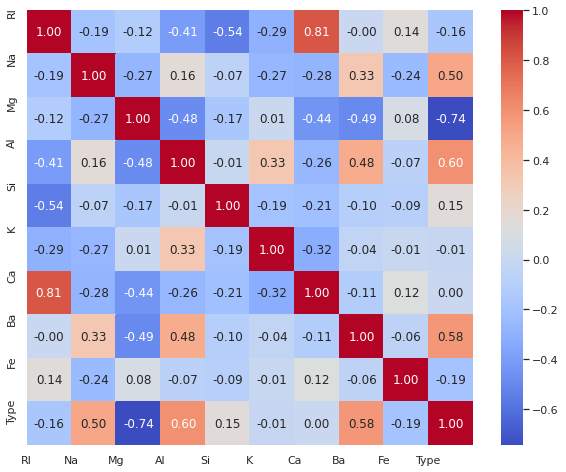

In [12]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [13]:
X = dataset.drop('Type', axis = 1).values
y = dataset['Type'].values.reshape(-1,1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [15]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (160, 9)
Shape of X_test:  (54, 9)
Shape of y_train:  (160, 1)
Shape of y_test (54, 1)


## Второй датасет

### Описание

Наблюдения: 942 000 Переменных: 13 Крипто-Токенов: 2,071
Все исторические значения открытия, максимума, минимума, закрытия для всех криптовалют.

Исправлен дубликат символа обмена монетами путем введения монетного слизняка
Данные актуальны по состоянию на 21 мая 2018 года
Добавлены две новые переменные: close_ratio и spread
Коэффициент закрытия - это дневная скорость закрытия, минимальная-максимальная с максимальными и минимальными значениями за день.
Близкое Соотношение = (Закрытие-Минимум)/(Максимум-Минимум)
Спред - это разница в долларах США между максимумом и минимумом за день.



### Загрузка данных

In [4]:
df = pd.read_csv('crypto-markets.csv')
df.head().T

,0,1,2,3,4
slug,bitcoin,bitcoin,bitcoin,bitcoin,bitcoin
symbol,BTC,BTC,BTC,BTC,BTC
name,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin
date,2013-04-28,2013-04-29,2013-04-30,2013-05-01,2013-05-02
ranknow,1,1,1,1,1
open,135.3,134.44,144,139,116.38
high,135.98,147.49,146.93,139.89,125.6
low,132.1,134,134.05,107.72,92.28
close,134.21,144.54,139,116.99,105.21
volume,0,0,0,0,0


In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [ ]:
def clean(text):
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace(r"^[a-zA-Z ]", "")
    text = ''.join([i for i in text if not i.isdigit()])
    return text

positive_reviews = hotel_dataset["positive_review"].values
negative_reviews = hotel_dataset['negative_review'].values

cleaned_positive_reviews = [clean(r) for r in positive_reviews] 
cleaned_negative_reviews = [clean(r) for r in negative_reviews] 

hotel_dataset['positive_review'] = cleaned_positive_reviews
hotel_dataset['negative_review'] = cleaned_negative_reviews


In [6]:
print("Latest crypto data")
latest_df = df[df['date'] == max(df['date'])]
latest_df.head()

Latest crypto data


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
2041,bitcoin,BTC,Bitcoin,2018-11-29,1.0,4269.000000,4413.020000,4145.770000,4278.850000,6.503348e+09,7.445102e+10,0.4980,267.25
3985,ripple,XRP,XRP,2018-11-29,2.0,0.391862,0.392465,0.373789,0.379562,6.299006e+08,1.530674e+10,0.3091,0.02
5196,ethereum,ETH,Ethereum,2018-11-29,3.0,122.720000,123.230000,115.300000,117.540000,2.196099e+09,1.216629e+10,0.2825,7.93
6774,stellar,XLM,Stellar,2018-11-29,4.0,0.161831,0.172107,0.155423,0.165080,8.886206e+07,3.162026e+09,0.5788,0.02
7269,bitcoin-cash,BCH,Bitcoin Cash,2018-11-29,5.0,190.100000,191.150000,176.830000,180.980000,8.916690e+07,3.164359e+09,0.2898,14.32


In [ ]:
print("Number of cryptocurrencies listed")
latest_df['symbol'].nunique()

Number of cryptocurrencies listed


10